# Prediction using Unsupervised ML

## Objective

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

## Dataset

click here to download the dataset : https://bit.ly/3kXTdox

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading the dataset

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Visualizing the Feature Columns to see the Distance between each feature

<Figure size 1152x864 with 0 Axes>

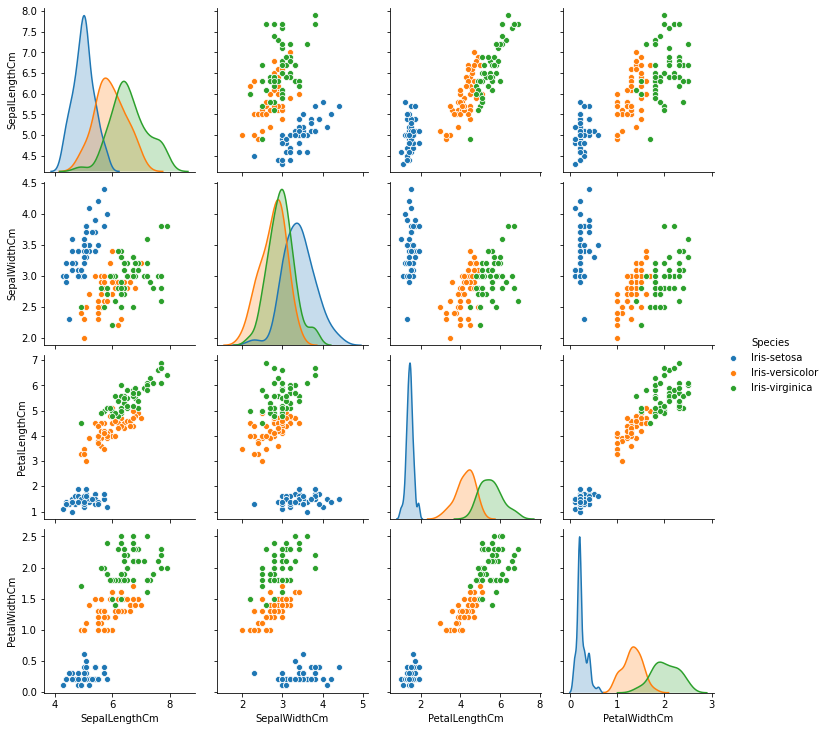

In [5]:
plt.figure(figsize=(16,12))
sns.pairplot(df,hue="Species")
plt.show()

## Visualizing the Feature Columns to see the Distribution

Text(0.5, 1.0, 'Histogram of PetalWidthCm')

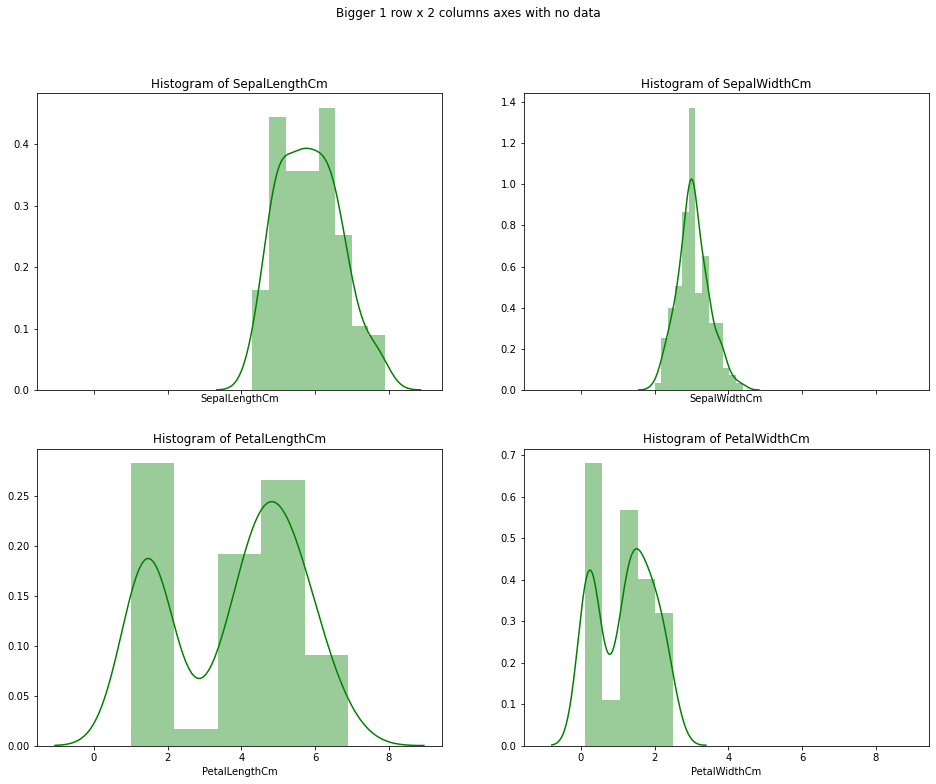

In [6]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(16,12))
fig.suptitle('Bigger 1 row x 2 columns axes with no data')

sns.distplot(ax=axes[0,0], a = df["SepalLengthCm"],color="green")
axes[0,0].set_title("Histogram of SepalLengthCm")

sns.distplot(ax=axes[0,1],a=df["SepalWidthCm"],color="green")
axes[0,1].set_title("Histogram of SepalWidthCm")

sns.distplot(ax=axes[1,0],a=df["PetalLengthCm"],color="green")
axes[1,0].set_title("Histogram of PetalLengthCm")

sns.distplot(ax=axes[1,1],a=df["PetalWidthCm"],color="green")
axes[1,1].set_title("Histogram of PetalWidthCm")


As, Some Columns are not in normal distribution form.

## Plot Boxplot for checking the outlier

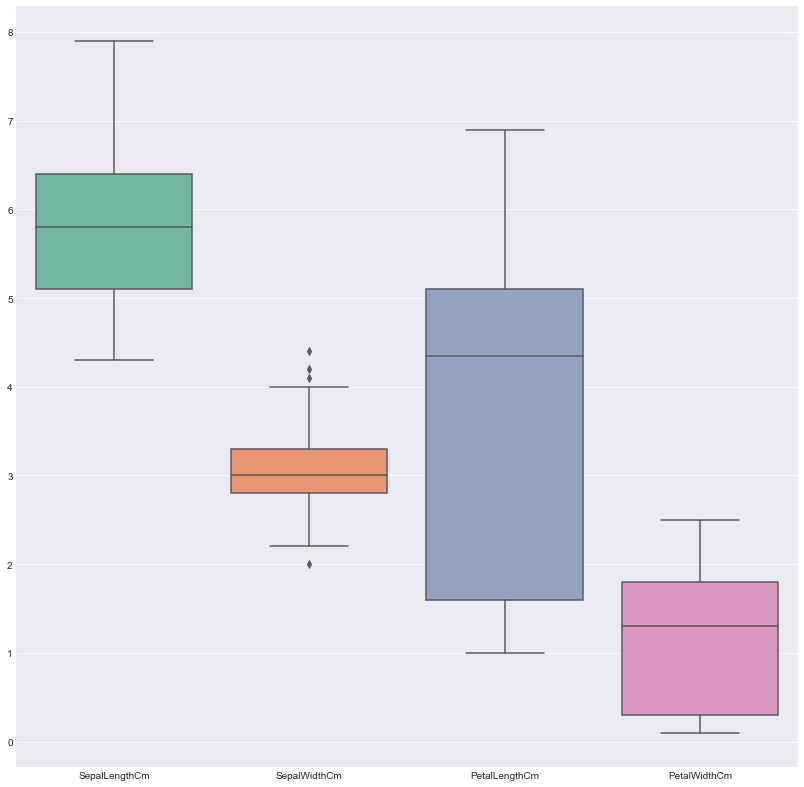

In [7]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(14,14))
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show()

As you can see, the column SepalWidth has outlier

## Remove Outlier by Inter Quartile Range

In [8]:
data = df.iloc[:,1]
Q1 = np.quantile(data,0.25)
Q3 = np.quantile(data,0.75)
IQR = Q3 - Q1
cut_off = IQR * 1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
outliers = [i for i in range(len(data)) if data[i] < lower or data[i] > upper]

In [9]:
print("Index of Outlier Row:",outliers)


Index of Outlier Row: [15, 32, 33, 60]


In [10]:
df = df.drop(outliers,axis=0)
df.reset_index(drop=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
141,6.7,3.0,5.2,2.3,Iris-virginica
142,6.3,2.5,5.0,1.9,Iris-virginica
143,6.5,3.0,5.2,2.0,Iris-virginica
144,6.2,3.4,5.4,2.3,Iris-virginica


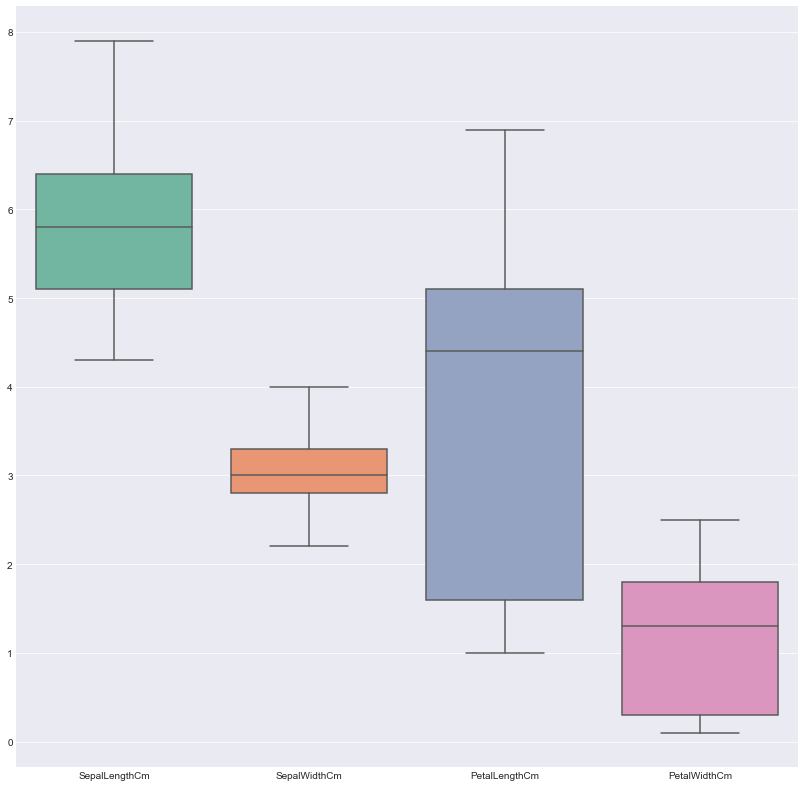

In [11]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(14,14))
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show()

# Again Visualizing the Feature Columns to see the Distribution

Text(0.5, 1.0, 'Histogram of PetalWidthCm')

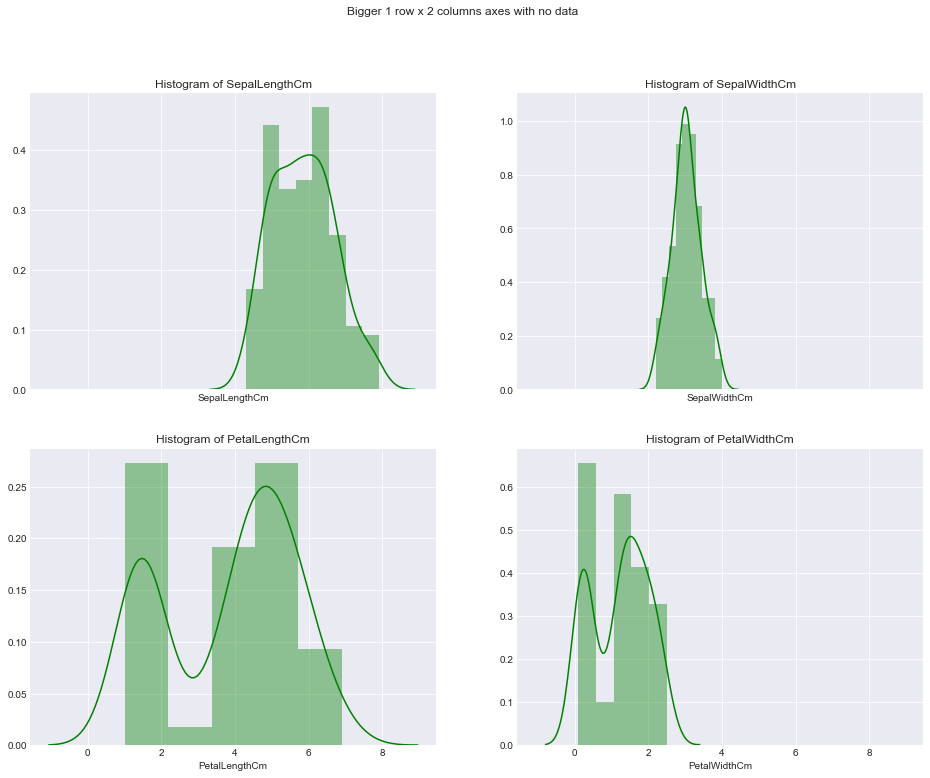

In [12]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(16,12))
fig.suptitle('Bigger 1 row x 2 columns axes with no data')

sns.distplot(ax=axes[0,0], a = df["SepalLengthCm"],color="green")
axes[0,0].set_title("Histogram of SepalLengthCm")

sns.distplot(ax=axes[0,1],a=df["SepalWidthCm"],color="green")
axes[0,1].set_title("Histogram of SepalWidthCm")

sns.distplot(ax=axes[1,0],a=df["PetalLengthCm"],color="green")
axes[1,0].set_title("Histogram of PetalLengthCm")

sns.distplot(ax=axes[1,1],a=df["PetalWidthCm"],color="green")
axes[1,1].set_title("Histogram of PetalWidthCm")

### Spliting the dataset into feature and target Column

In [13]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### Applying KMeans Clustering Algorithm

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='random',n_init=10, max_iter=300, tol=1e-04,random_state=0).fit(X)

In [15]:
kmeans.cluster_centers_

array([[4.97659574, 3.36595745, 1.46382979, 0.24468085],
       [5.91639344, 2.76065574, 4.40819672, 1.44098361],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [16]:
y_pred = kmeans.labels_
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### Visulizing the Cluster to Evaluate the model

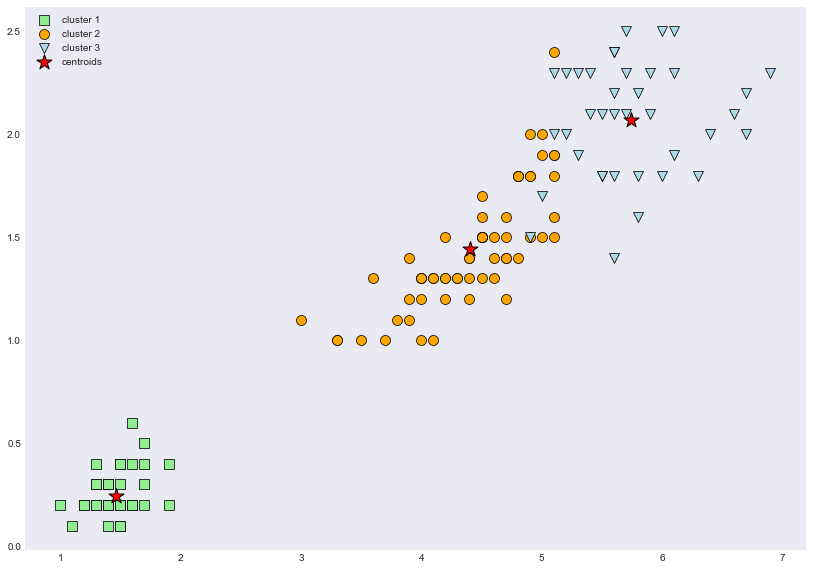

In [24]:
plt.figure(figsize=(14,10))
sns.scatterplot(X[y_pred == 0, 2], X[y_pred == 0, 3],s=100,color='lightgreen',marker='s', edgecolor='black',label='cluster 1')
sns.scatterplot(X[y_pred == 1, 2], X[y_pred == 1, 3],s=100,color='orange',marker='o', edgecolor='black',label='cluster 2')
sns.scatterplot(X[y_pred == 2, 2], X[y_pred == 2, 3],s=100,color='lightblue',marker='v', edgecolor='black',label='cluster 3')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:, 3],s=250, marker='*',
    c='red', edgecolor='black',label='centroids')

plt.legend(scatterpoints=1,loc='upper left')
plt.grid()
plt.show()